In [84]:
!git clone https://github.com/AlbDav27/Ext_car
%cd /content/Ext_car/
!git pull
%cd /content/
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters

fatal: destination path 'Ext_car' already exists and is not an empty directory.
/content/Ext_car
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/AlbDav27/Ext_car
   19e0930..437d205  main       -> origin/main
Updating 19e0930..437d205
Fast-forward
 images/Forma/Train/Fig14.png | Bin 3820 -> 4161 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
/content


### Lectura de archivo de imágenes 

In [2]:
Blue=os.path.join("Ext_car/images/Azul.png")
Black=os.path.join("Ext_car/images/Negro.png")
Green=os.path.join("Ext_car/images/Verde.png")
Ima=os.path.join("Ext_car/foto (1).jpg")

In [3]:
Bl = Image.open(Blue)
Bk = Image.open(Black)
Gn = Image.open(Green)
Im=Image.open(Ima)
imform = Image.open(Ima).convert('L')

## Analizamos los datos 

In [4]:
# Removiendo el canal alpha 
ABk=np.array(Bk)[:,:,0:3]
ABl=np.array(Bl)[:,:,0:3]
AGn=np.array(Gn)[:,:,0:3]
Imn=np.array(Im)[:,:,0:3]
Imf=np.array(imform)

Filtrado de la imagen original

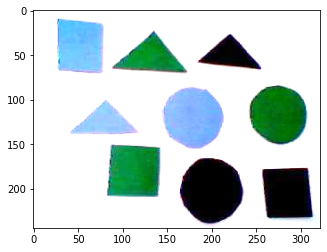

In [5]:
#!pip install opencv-python
from skimage import exposure
from skimage import io
import cv2

contrast_img = cv2.addWeighted(Imn, 2.5, np.zeros(Imn.shape, Imn.dtype), 0, 7)


# Estiramiento de contraste
p5, p95 = np.percentile(contrast_img, (5,95))
img_rescale = exposure.rescale_intensity(contrast_img, in_range=(p5,p95))

plt.imshow(img_rescale)
plt.show()



Separando la imagen por las formas

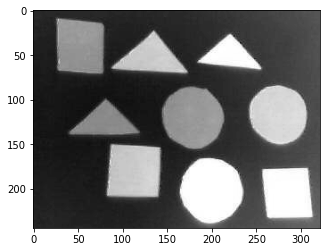

In [6]:
inverted=ski.util.invert(Imf)
plt.imshow(inverted,cmap='gray')
plt.show()

In [7]:
def umbral_image(img,lim):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>lim:
                z[i,j]=250
    return z

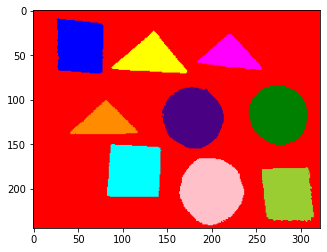

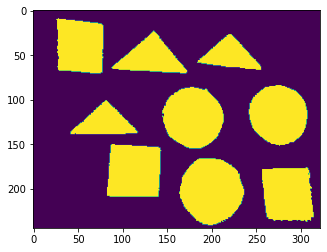

In [8]:
# Binarizar imagen 
inv=umbral_image(inverted,160)
label_image=ski.measure.label(inv)
plt.imshow(ski.color.label2rgb(label_image))
plt.show()
plt.imshow(inv)
plt.show()


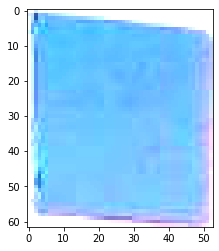

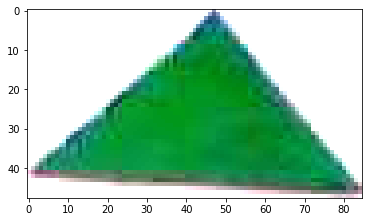

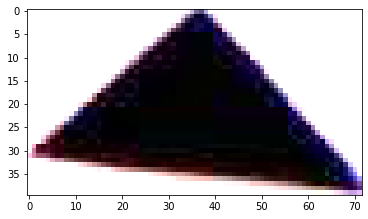

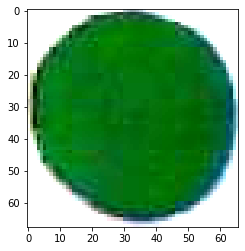

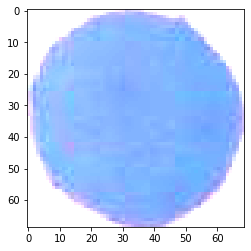

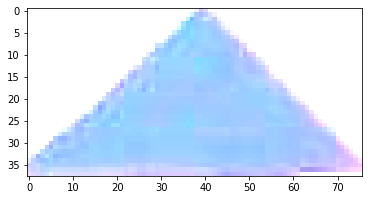

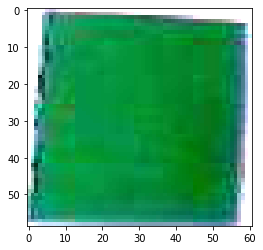

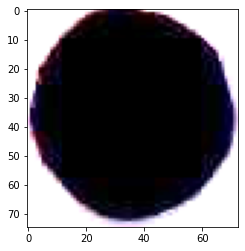

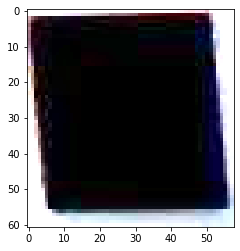

In [10]:
regions = ski.measure.regionprops(label_image)
X_color_t=[]
X_form_t=[]
imgs_croped=[]
for i in range(len(regions)):
  momento =regions[i].moments_hu
  bound =regions[i].bbox
  cent=regions[i].centroid
  part=img_rescale[int(cent[0])-5:int(cent[0])+5,int(cent[1])-5:int(cent[1])+5]
  col=np.zeros(3)
  col[0]=int(np.mean(part[:,:,0]))
  col[1]=int(np.mean(part[:,:,1]))
  col[2]=int(np.mean(part[:,:,2]))
  X_color_t.append(col)
  X_form_t.append(momento)
  croped=img_rescale[bound[0]:bound[2],bound[1]:bound[3]]
  plt.imshow(croped)
  plt.show()
  imgs_croped.append(croped)
X_color_test=np.array(np.uint8(X_color_t))
X_form_test=np.array(X_form_t)
y_color_test=[[0,0,1],[0,1,0],[1,0,0],[0,1,0],[0,0,1],[0,0,1],[0,1,0],[1,0,0],[1,0,0]]
y_forma_test=[[1,0,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,1,0],[1,0,0],[0,0,1],[1,0,0]]

# Detectando el color por valor del pixel 
Extrayendo las características 

In [12]:
print(ABk[100,100])
print(ABl[100,100])
print(AGn[100,100])

[0 0 0]
[  0   0 255]
[ 16 114  13]


# Clasificador de color

In [13]:
#importar sklearn
from sklearn.neural_network import MLPClassifier

## Preparando los datos 

### Salidas 

(Necesario codificarlas) 
- negro=1,0,0
- verde=0,1,0
- azul=0,0,1




In [14]:
def Lector_de_imagenes(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath)
            Train_data.append(np.array(img)[:,:,0:3][100,100]) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags

In [15]:
X_color_train,y_color_train=Lector_de_imagenes("Ext_car/images/colores_mio","Ext_car/Train_color.json")

In [16]:
X_color_train

array([[112, 173,  71],
       [  0, 163,   0],
       [ 52,  52,  52],
       [ 38,  38,  38],
       [104, 233, 236],
       [ 18,  17,  17],
       [ 38,  38,  38],
       [ 24,  23,  23],
       [157, 195, 230],
       [ 78, 143,   0],
       [ 35, 229,  50],
       [ 91, 155, 213],
       [ 16, 114,  13],
       [  6,  23, 247],
       [ 24, 180, 196],
       [ 21,  93,  22],
       [  0, 176, 240],
       [  0,   0,   0]], dtype=uint8)

## Ajustar Parámetros del modelo

In [187]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-6,
                  hidden_layer_sizes=(13,13))

## Ajuste del modelo

In [190]:
clfcolor.fit(X_color_train,y_color_train)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [196]:
pred = clfcolor.predict(X_color_test)
print(pred)
print (y_color_test)

[[0 0 1]
 [0 1 1]
 [0 0 0]
 [0 1 1]
 [0 0 1]
 [0 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 0]]
[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0]]


## Evaluar al modelo 

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [197]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_color_test)
print(predclass)
print(yclass)

[2, 1, 0, 1, 2, 2, 1, 0, 0]
[2, 1, 0, 1, 2, 2, 1, 0, 0]


In [193]:
print(accuracy_score(predclass,yclass)) 

1.0


In [43]:
print(confusion_matrix(predclass,yclass))


[[3 0 3]
 [0 3 0]
 [0 0 0]]


## Clasificador de forma 
### Lectura de archivo de imágenes 

## Preparando los datos

Para este primer caso usaremos aprendizaje supervisado,los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- Cuadro=1,0,0
- Triángulo=0,1,0
- Círculo=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]

In [148]:
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing,25)
    label_image=ski.measure.label(Uing)
    #plt.imshow(ski.color.label2rgb(label_image))
    #plt.show()
    regions = ski.measure.regionprops(label_image)
    #print(len(regions))
    if len(regions)>1:
      momento =regions[1].moments_hu
    else:
      momento =regions[0].moments_hu
    return momento
def Lector_forma(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    name=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
            name.append(img)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath).convert('L')
            Train_data.append(hu_Characteristics(np.array(img))) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags, name 

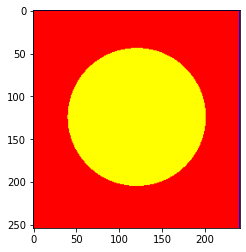

2


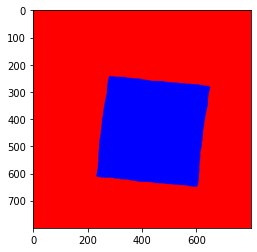

1


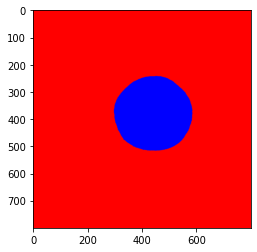

1


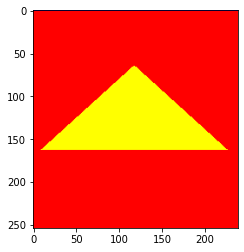

2


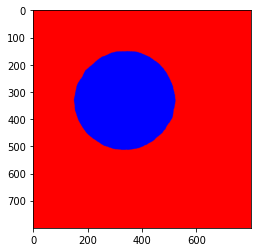

1


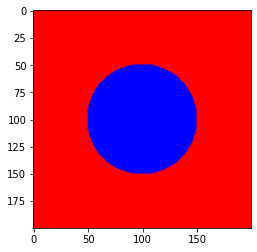

1


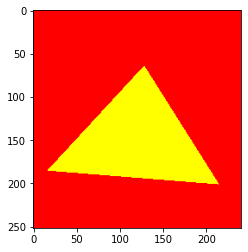

2
Tag error: desktop.ini
file error: desktop.ini


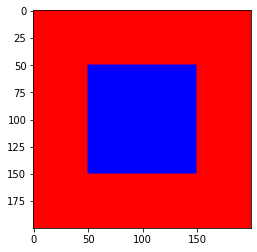

1


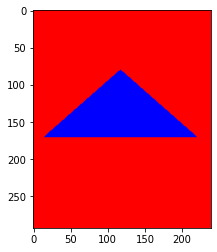

1


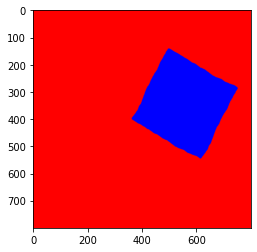

1
[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]
['Fig8.png', 'Fig3.png', 'Fig10.png', 'Fig15.png', 'Fig2.png', 'Fig12.png', 'Fig7.png', 'Fig13.png', 'Fig14.png', 'Fig11.png']
[[ 1.59155205e-01  1.57885371e-08  2.54925565e-09  5.07460042e-14
  -4.22699771e-25 -5.80373408e-18 -3.93012584e-25]
 [ 1.66719514e-01  1.39508895e-05  1.05831946e-06  1.17762518e-07
  -2.37733945e-14  2.04361853e-10  3.41057319e-14]
 [ 1.59365801e-01  4.76775209e-05  1.36881255e-06  7.57078859e-10
  -7.09176749e-18 -2.02090145e-12 -2.33169616e-17]
 [ 2.34270329e-01  1.78587659e-02  5.83472463e-03  2.87156978e-04
  -3.71697161e-07 -3.83747092e-05  2.67022890e-23]
 [ 1.59223744e-01  1.36265771e-05  5.01660805e-07  1.21206297e-10
   9.93178395e-20  1.21035462e-13  9.39900039e-19]
 [ 1.59156341e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.00395861e-01  3.13502028e-03  4.81794942e-03  7.30983938e-05
  -4.1342333

In [149]:
X_forma_train,y_forma_train, name=Lector_forma("Ext_car/images/Forma/Train","Ext_car/Train_forma.json")

## Ajustar Parámetros del modelo

In [150]:
clforma = MLPClassifier(solver='lbfgs', alpha=1e-6,
                  hidden_layer_sizes=(15,15))

## Ajuste del modelo

In [161]:
clforma.fit(X_forma_train,y_forma_train)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 15), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [202]:
pred = clforma.predict(X_form_test)
print(pred)

[[0 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


## Evaluar al modelo 

In [218]:
predclassf=ClassDetector(pred)
yclass=ClassDetector(y_forma_test)
print(predclassf)
print(yclass)

[0, 1, 1, 2, 2, 1, 0, 2, 0]
[0, 1, 1, 2, 2, 1, 0, 2, 0]


In [204]:
loaded_model = joblib.load(filename)


In [206]:
load_predict=loaded_model.predict(X_form_test)

In [219]:
predclassf=ClassDetector(load_predict)
print(predclassf)
print(yclass)

[0, 1, 1, 2, 2, 1, 0, 2, 0]
[0, 1, 1, 2, 2, 1, 0, 2, 0]


In [220]:
print(accuracy_score(predclassf,yclass)) 

1.0


In [221]:
print(confusion_matrix(predclassf,yclass))

[[3 0 0]
 [0 3 0]
 [0 0 3]]


Presentación de resultados

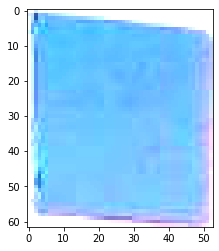

Color: azul
Forma: Cuadrado


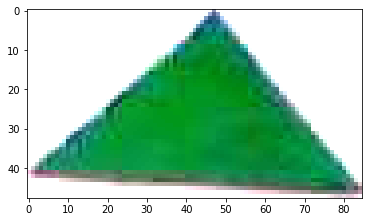

Color: verde
Forma: Triangulo


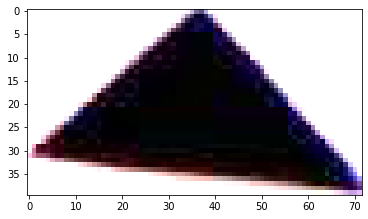

Color: negro
Forma: Triangulo


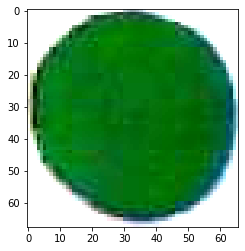

Color: verde
Forma: Circulo


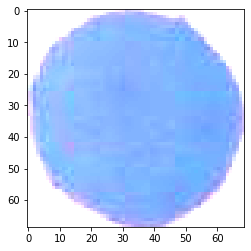

Color: azul
Forma: Circulo


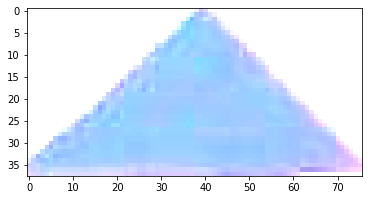

Color: azul
Forma: Triangulo


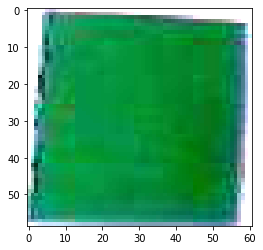

Color: verde
Forma: Cuadrado


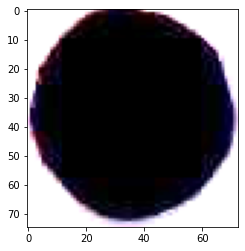

Color: negro
Forma: Circulo


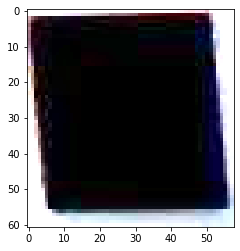

Color: negro
Forma: Cuadrado


In [222]:
i=0;
for im in imgs_croped:
  plt.imshow(im)
  plt.show()
  if predclass[i]==0:
    print("Color: negro")
  elif predclass[i]==1:
    print("Color: verde")
  else:
    print("Color: azul")
  if predclassf[i]==0:
    print("Forma: Cuadrado")
  elif predclassf[i]==1:
    print("Forma: Triangulo")
  else:
    print("Forma: Circulo")
  i=i+1

In [170]:
# Implementar el modelo

In [171]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [173]:
filename = 'clfforma_model.sav'
joblib.dump(clforma, filename)

['clfforma_model.sav']

In [ ]:
loaded_model = joblib.load(filename)


In [ ]:
load_predict=loaded_model.predict(X_test)

In [ ]:
ClassDetector(load_predict)

[0, 0, 1, 1, 0, 0]